# 	Predicting Product Sales Based on Historical Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Historical_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

ModuleNotFoundError: No module named 'pandas'

In [2]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          4849 non-null   int64 
 1   Article_ID    4849 non-null   int64 
 2   Country_Code  4849 non-null   object
 3   Sold_Units    4849 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 151.7+ KB
None
               Date  Article_ID   Sold_Units
count  4.849000e+03  4849.00000  4849.000000
mean   2.017794e+07  2314.55331     1.966797
std    5.981690e+03  1813.23926     2.373171
min    2.017010e+07   332.00000     1.000000
25%    2.017093e+07   409.00000     1.000000
50%    2.018041e+07  1923.00000     1.000000
75%    2.018092e+07  3448.00000     2.000000
max    2.019021e+07  5984.00000   101.000000


In [3]:
missing_values = data.isnull().sum()
missing_values


Date            0
Article_ID      0
Country_Code    0
Sold_Units      0
dtype: int64

In [4]:
data = data.drop_duplicates()


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()


,Date,Article_ID,Country_Code,Sold_Units,Year,Month
0,2017-08-17,1132,AT,1,2017,8
1,2017-08-18,1132,AT,1,2017,8
2,2017-08-21,1132,AT,1,2017,8
3,2017-08-22,1132,AT,1,2017,8
4,2017-09-06,1132,AT,1,2017,9


In [6]:
data.describe()


,Date,Article_ID,Sold_Units,Year,Month
count,4849,4849.00000,4849.000000,4849.000000,4849.000000
mean,2018-03-19 09:38:47.490203904,2314.55331,1.966797,2017.729635,6.325840
min,2017-01-01 00:00:00,332.00000,1.000000,2017.000000,1.000000
25%,2017-09-29 00:00:00,409.00000,1.000000,2017.000000,3.000000
50%,2018-04-10 00:00:00,1923.00000,1.000000,2018.000000,6.000000
75%,2018-09-24 00:00:00,3448.00000,2.000000,2018.000000,10.000000
max,2019-02-13 00:00:00,5984.00000,101.000000,2019.000000,12.000000
std,NaN,1813.23926,2.373171,0.608749,3.620144


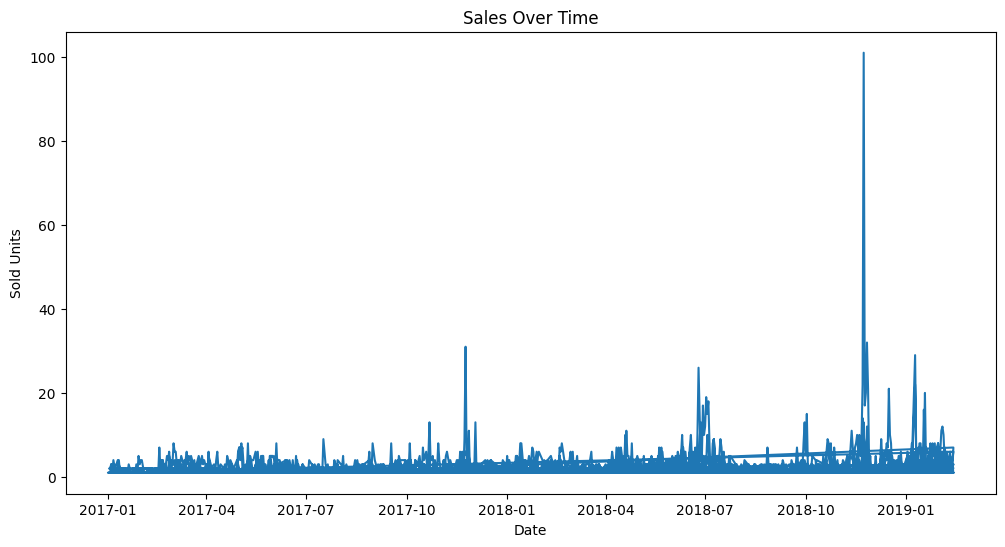

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Sales distribution
# sns.histplot(data['Sold_Units'], kde=True)
# plt.title('Sales Distribution')
# plt.show()

# Sales over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sold_Units'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sold Units')
plt.show()


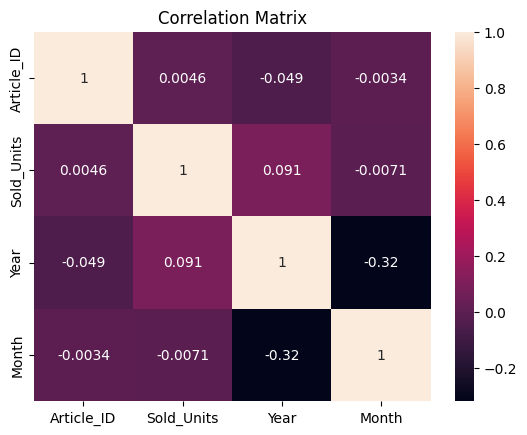

In [8]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


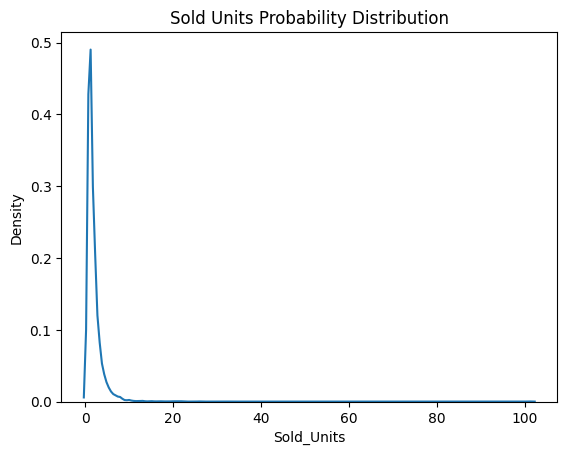

In [9]:
sns.kdeplot(data['Sold_Units'])
plt.title('Sold Units Probability Distribution')
plt.show()


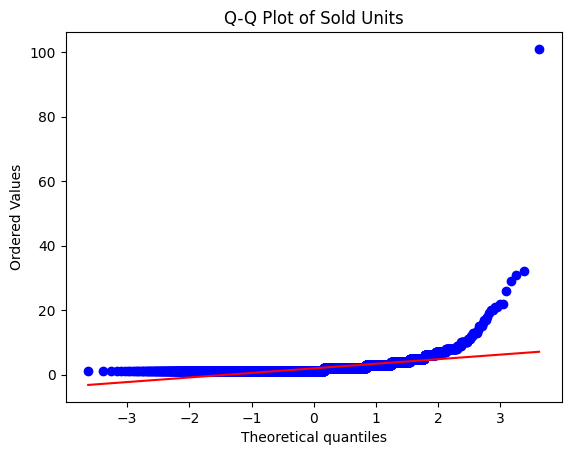

In [10]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

stats.probplot(data['Sold_Units'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sold Units')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = data[['Year', 'Month']]  # Example features
y = data['Sold_Units']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 2.756660092988146
R-squared: 0.00817648360362766


In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
Year,0.407180
Month,0.019991


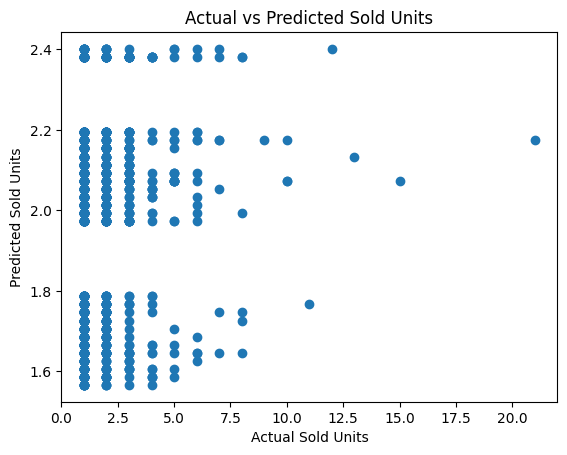

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sold Units')
plt.ylabel('Predicted Sold Units')
plt.title('Actual vs Predicted Sold Units')
plt.show()


In [19]:
accuracy_percentage = r2 * 100
print('Model Accuracy:', accuracy_percentage, '%')

Model Accuracy: 0.817648360362766 %
